Accuracy: 0.97


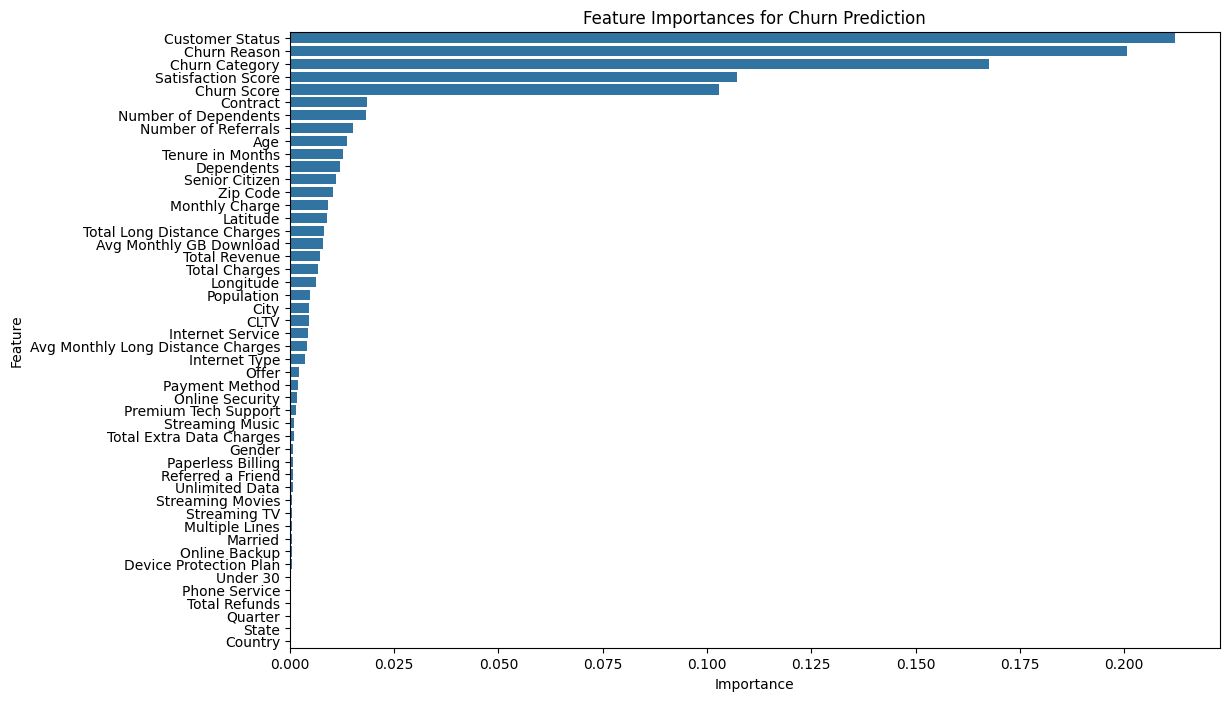

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/drive/MyDrive/telcom_m.csv'
df = pd.read_csv(file_path)

# Drop the 'Customer ID' column as it is not useful for prediction
df.drop(columns=['Customer ID'], inplace=True)

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features (X) and target (y)
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get feature importances
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)

plt.title('Feature Importances for Churn Prediction')
plt.show()




In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# displaying thr importance features

In [83]:
importance_df.head(10)

,Feature,Importance
43,Customer Status,0.212324
47,Churn Reason,0.200730
46,Churn Category,0.167541
42,Satisfaction Score,0.107258
44,Churn Score,0.102983
33,Contract,0.018445
6,Number of Dependents,0.018380
16,Number of Referrals,0.015046
1,Age,0.013600
17,Tenure in Months,0.012839


In [84]:
data = importance_df[importance_df['Importance'] > 0.01]

In [85]:
data

,Feature,Importance
43,Customer Status,0.212324
47,Churn Reason,0.200730
46,Churn Category,0.167541
42,Satisfaction Score,0.107258
44,Churn Score,0.102983
33,Contract,0.018445
6,Number of Dependents,0.018380
16,Number of Referrals,0.015046
1,Age,0.013600
17,Tenure in Months,0.012839


In [86]:
hidden_df = df[['Contract', 'Number of Referrals']]

hidden_features =['Contract', 'Number of Referrals']

# hidden Navie bayes

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [88]:
X_train_hidden = X_train.copy()
X_train_hidden[hidden_features] = hidden_df[hidden_features]

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_hidden, y_train)

# Predict on test set
X_test_hidden = X_test.copy()
X_test_hidden[hidden_features] = hidden_df[hidden_features]

y_pred = nb_model.predict(X_test_hidden)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Model Accuracy: 0.9670231729055259
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       544
           1       0.97      0.96      0.97       578

    accuracy                           0.97      1122
   macro avg       0.97      0.97      0.97      1122
weighted avg       0.97      0.97      0.97      1122



In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
telco_df = pd.read_csv('/content/drive/MyDrive/telcom_m.csv')

# Drop columns that are not useful for the model
telco_df_cleaned = telco_df.drop(columns=['Customer ID', 'Country', 'State', 'City', 'Zip Code'])

# Encode categorical columns
label_encoders = {}
categorical_columns = telco_df_cleaned.select_dtypes(include=['object']).columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    telco_df_cleaned[column] = label_encoders[column].fit_transform(telco_df_cleaned[column])

# Define features and target variable
X = telco_df_cleaned.drop(columns=['Churn Label'])
y = telco_df_cleaned['Churn Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9688057040998217
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       544
           1       0.97      0.97      0.97       578

    accuracy                           0.97      1122
   macro avg       0.97      0.97      0.97      1122
weighted avg       0.97      0.97      0.97      1122



In [90]:
hidden_df.head()

,Contract,Number of Referrals
0,0,0
1,0,1
2,0,0
3,0,1
4,0,1


from matplotlib import pyplot as plt
_df_0['Number of Referrals'].plot(kind='hist', bins=20, title='Number of Referrals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Contract']
  ys = series['Number of Referrals']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Contract', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Contract')
_ = plt.ylabel('Number of Referrals')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Contract']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Contract'}, axis=1)
              .sort_values('Contract', ascending=True))
  xs = counted['Contract']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Contract', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Contract')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Number of Referrals'].plot(kind='line', figsize=(8, 4), title='Number of Referrals')
plt.gca().spines[['top', 'right']].set_visible(False)

In [96]:
X = df[data['Feature']]

In [92]:
X.head()

,Customer Status,Churn Reason,Churn Category,Satisfaction Score,Churn Score,Contract,Number of Dependents,Number of Referrals,Age,Tenure in Months,Dependents,Senior Citizen,Zip Code
0,0,5,1,3,91,0,0,0,78,1,0,1,90022
1,0,3,1,3,69,0,1,1,74,8,1,1,90063
2,0,3,1,2,81,0,3,0,71,18,1,1,90065
3,0,11,2,2,88,0,1,1,78,25,1,1,90303
4,0,8,4,2,67,0,1,1,80,37,1,1,90602


In [93]:
y = df['Churn Label']

In [94]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [95]:
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       367
           1       0.97      0.97      0.97       381

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748

